<h1 align="center">Pandas Library - Introduction</h1>
<br />
<center><i>Manipulating Dataset is easy peasy lemon squeezy</i></center>

----

👋 What's shaking, bacon? In this new lesson I will show you a simple introduction to `Pandas`, a Python library to manipulate datasets in a variaty formats, such as `CSV` and `XLSX`.

First things first, let's install it by running the following command on your Command Prompt:

> Using PIP

```bash
pip install pandas
```

> Using Conda

```bash
conda install pandas
```

----

Okay, now that we already have Pandas installed, let's get going to the code!!

**PS.:** you can download the `Jupyter Notebook` and the `dataset` files from this lesson in this GitHub Repository [pandas-basics](https://github.com/CSFelix/pandas-basics).

----

<h2>0) Reading Dataset</h2>

To read datasets, we use the `read_csv` function, and before you ask me about the parameters, I will not cover all of them here, because there a bunch of them - even though you are interested about them, you can check it out on [Pandas Read_CSV Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [21]:
#
# ---- Reading CSV Dataset ----
#
import pandas as pd

filepath = "./datasets/jojo-stands.csv"
df = pd.read_csv(filepath)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 1886: invalid start byte

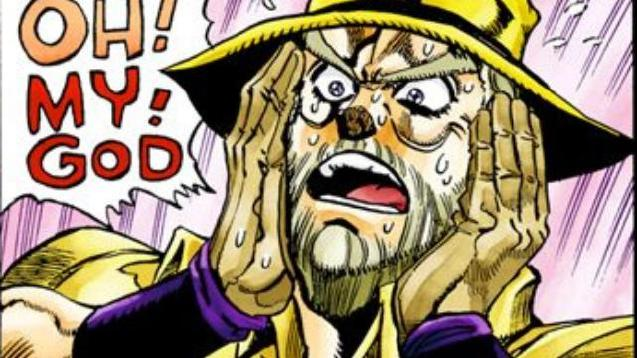

----

Don't worry, I planned this error!!!

I wanna say that 80% of the datasets you'll be working in the future will be on charset `UTF-8`. However - especially if you live in a country where this charset is not the default, such as Japan - you will get this same error I got hhere: `there are characters that cannot be identifyed as UTF-8`.

To solve this, we will be using `chardet` library. This library reads a fragment of the dataset and guesses which charset is in it. After that, you can try to read the dataset again with pandas assigning the properly charset. To install `chardet`, you run the following command on your command prompt:

> Using PIP:

```bash
pip install chardet
```

> Using Conda:

```bash
conda install chardet
```

With the library already installed, let's find out what charset is the dataset in.

In [22]:
#
# ---- Figuring Out Dataset Charset with Chardet ----
#
import chardet 

# Reading the first 100,000 bytes to guess the charset
with open(filepath, 'rb') as file:
    guessed_chardet = chardet.detect(file.read(100000))

print(guessed_chardet)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Hmm, so there is a 73% chance to the charset be `ISO-8859-1`. So let's try to read the dataset with this carset. In case we got the same error again, we use chardet again, but reading the first 200,000 bytes.

In [23]:
df = pd.read_csv(filepath, encoding='ISO-8859-1')

# If everything goes well, let's print the first 5 rows
df.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Anubis,B,B,E,A,E,C
1,Atum,D,C,D,B,D,D
2,Bastet,E,E,B,A,E,E
3,Cream,B,B,D,C,C,D
4,Death Thirteen,C,C,E,B,D,B


Yeaaay, we got it!! Now, to finish this first part, let's count how many rows and columns thee dataset contains, list the columns names and display a basic statistical overview.

In [24]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]} ({list(df.columns)})")

df.describe()

Number of Rows: 156
Number of Columns: 7 (['Stand', 'PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV'])


,Stand,PWR,SPD,RNG,PER,PRC,DEV
count,156,156,156,156,156,156,156
unique,154,7,7,7,7,7,7
top,Echoes (ACT3),E,B,A,A,E,E
freq,2,34,41,38,85,56,41


----

<h2>1) Operations</h2>

Operations-wise, we will cover the five main ones: `renaming`, `selecting`, `updating`, `inserting` and `deleting/dropping`.


<h3>1.1) Renaming</h3>

`Renaming` refers to rename the columns name. In this part, let's rename the columns to follows:

> New Features Names

```
PWR >> Power
SPD >> Speed
RNG >> Range
PER >> Stamina
PRC >> Precision
DEV >> Development_Potencial
```

In [25]:
#
# ---- Renaming Columns ----
#
new_names = {
    'PWR'    :  'Power'
    , 'SPD'  :  'Speed'
    , 'RNG'  :  'Range'
    , 'PER'  :  'Stamina'
    , 'PRC'  :  'Precision'
    , 'DEV'  :  'Development_Potencial'
}

df.rename(columns=new_names, inplace=True)
df.head()

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
0,Anubis,B,B,E,A,E,C
1,Atum,D,C,D,B,D,D
2,Bastet,E,E,B,A,E,E
3,Cream,B,B,D,C,C,D
4,Death Thirteen,C,C,E,B,D,B



<h3>1.2) Selecting</h3>

Now, let's `select` some columns and rows of our Data Frame. There are several ways to do it, so I will be showing just the most used ones here.

In [34]:
#
# ---- Selecting a Single Column ----
#
df['Power'].head()

0    B
1    D
2    E
3    B
4    C
Name: Power, dtype: object

In [36]:
#
# ---- Seleting Multiple Columns ----
#
df[['Power', 'Speed', 'Development_Potencial']].head()

,Power,Speed,Development_Potencial
0,B,B,C
1,D,C,D
2,E,E,E
3,B,B,D
4,C,C,B


In [53]:
#
# ---- Selecting a Single Row ----
#
df[0:1]

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
0,Anubis,B,B,E,A,E,C


In [51]:
#
# ---- Selecting Multiple Rows ----
#
df[0:10]

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
0,Anubis,B,B,E,A,E,C
1,Atum,D,C,D,B,D,D
2,Bastet,E,E,B,A,E,E
3,Cream,B,B,D,C,C,D
4,Death Thirteen,C,C,E,B,D,B
5,Geb,C,B,A,B,D,D
6,High Priestess,C,B,A,A,D,D
7,Horus,B,B,D,C,E,C
8,Judgement,B,B,C,B,D,D
9,Khnum,E,E,E,A,E,E


In [54]:
#
# ---- Selecting Rows with iloc ----
#
df.iloc[15:20]

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
15,Emperor,B,B,B,C,E,E
16,Ebony Devil,D,D,A,B,D,B
17,Empress,C,E,A,A,D,D
18,Hanged Man,C,A,A,B,D,D
19,Hermit Purple,D,C,D,A,D,E


In [60]:
#
# ---- Selecting Rows with Conditions ----
#
#
# - selecting stands with Power and Development_Potencial stats equals to 'A'
#
df.loc[(df['Power'] == 'A') & (df['Development_Potencial'] == 'A')]

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
25,Star Platinum,A,A,C,A,A,A
46,Killer Queen,A,B,D,B,B,A
47,Sheer Heart Attack,A,C,A,A,E,A
52,Red Hot Chili Pepper,A,A,A,A,C,A
63,Baby Face,A,B,A,A,E,A
79,Green Day,A,C,A,A,E,A
84,Notorious B.I.G,A,Infi,Infi,Infi,E,A
94,Stone Free,A,B,C,A,C,A
106,Kiss,A,A,A,A,C,A
114,Weather Report,A,B,C,A,E,A



<h3>1.3) Updating</h3>

`Updating` is the action to change row values. In this example, let's apply an Encoding to the values, that is, convert the strings to numbers:

```
None  >>    0
E     >>    1
D     >>    2
C     >>    3
B     >>    4
A     >>    5
Infi  >>  999
```

In [65]:
#
# ---- Updating Values ----
#
df.fillna(0, inplace=True)
df.replace('None', 0, inplace=True)
df.replace('E', 1, inplace=True)
df.replace('D', 2, inplace=True)
df.replace('C', 3, inplace=True)
df.replace('B', 4, inplace=True)
df.replace('A', 5, inplace=True)
df.replace('Infi', 999, inplace=True)

df.head()

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
0,Anubis,4,4,1,5,1,3
1,Atum,2,3,2,4,2,2
2,Bastet,1,1,4,5,1,1
3,Cream,4,4,2,3,3,2
4,Death Thirteen,3,3,1,4,2,4



<h3>1.4) Deleting / Dropping</h3>

Now, let's `delete / drop` the first rows - adiós Anubis Stand! Oh, `delete` and `drop` means the same thing, both terms are interchangeable.

In [85]:
#
# ---- Deleting / Dropping Rows ----
#
anubis_stand = df.iloc[0]
df.drop(0, inplace=True)

print(f'Anubis Stand: {anubis_stand}')
df.head()

Anubis Stand: Stand                    Anubis
Power                         4
Speed                         4
Range                         1
Stamina                       5
Precision                     1
Development_Potencial         3
Name: 0, dtype: object


,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
1,Atum,2,3,2,4,2,2
2,Bastet,1,1,4,5,1,1
3,Cream,4,4,2,3,3,2
4,Death Thirteen,3,3,1,4,2,4
5,Geb,3,4,5,4,2,2



<h3>1.5) Inserting</h3>

Hmmm, I like Anubis Stand, so let's add it again!!

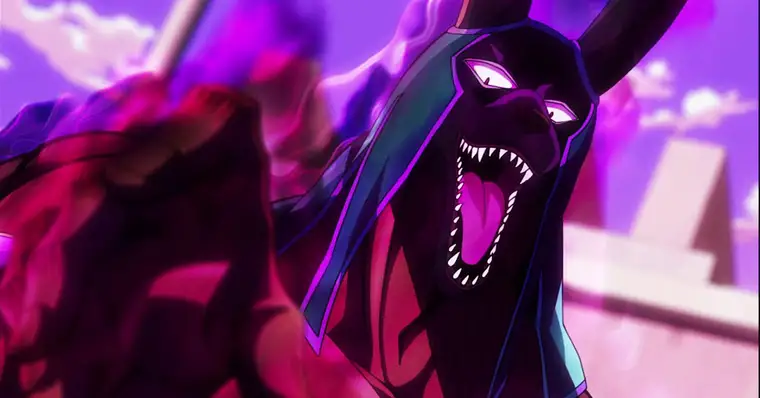

In [102]:
#
# ---- Inserting Rows ----
#
# - adding to the end
#
df.loc[len(df.index)] = anubis_stand
df

,Stand,Power,Speed,Range,Stamina,Precision,Development_Potencial
1,Atum,2,3,2,4,2,2
2,Bastet,1,1,4,5,1,1
3,Cream,4,4,2,3,3,2
4,Death Thirteen,3,3,1,4,2,4
5,Geb,3,4,5,4,2,2
...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1
152,Purple Haze Distortion,5,4,1,1,3,5
153,Rainy Day Dream Away,1,4,5,5,1,1
154,Remote Romance,1,2,999,4,3,1


----

Well, it was kinda a large lesson we got today, wasn't it? But you gotta agree with me, this lesson was amazing!

See you in the next post!! 👋